In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from collections import Counter
from imblearn.over_sampling import SMOTE 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score, classification_report

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.drop("Time",axis=1,inplace=True)

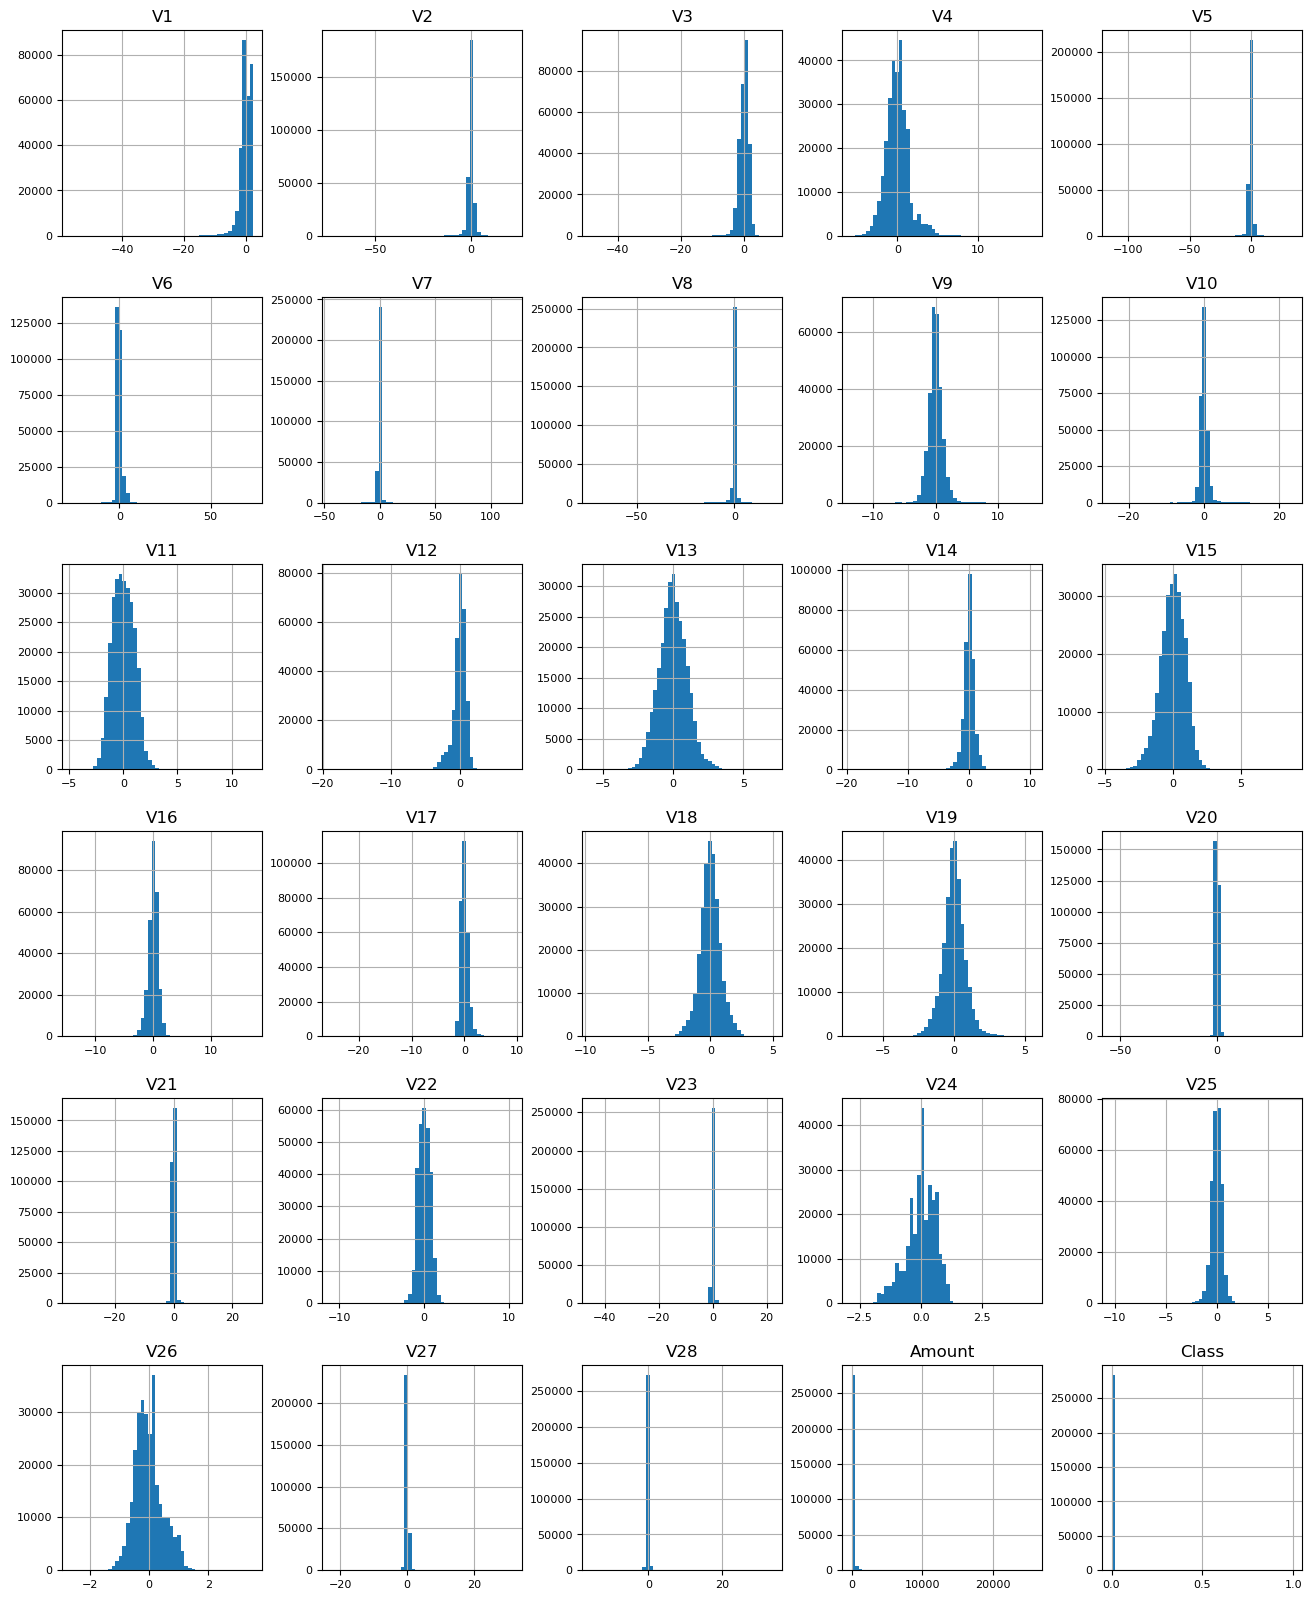

In [6]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

<Axes: xlabel='Class', ylabel='count'>

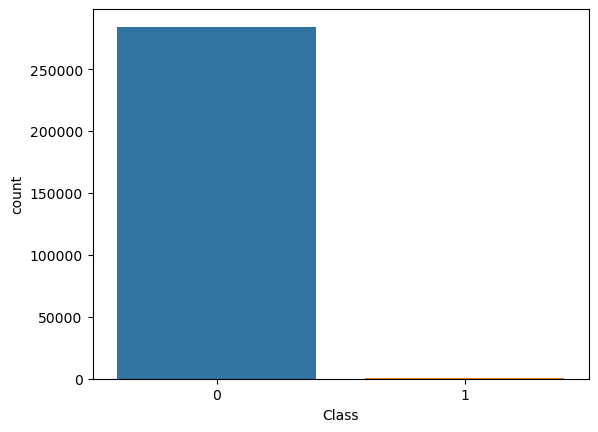

In [7]:
sns.countplot(x="Class",data=data)

In [8]:
(data["Class"].value_counts()/284807)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [9]:
X= data.drop("Class",axis=1)
y=data["Class"]

In [10]:
import matplotlib.pyplot as plt

# Data before oversampling
class_counts_before = Counter(y)

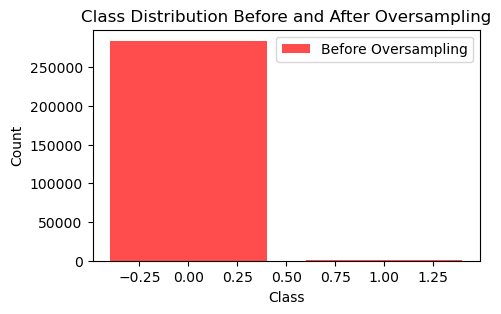

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))

# Before oversampling
ax.bar(class_counts_before.keys(), class_counts_before.values(), color='red', alpha=0.7, label='Before Oversampling')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution Before and After Oversampling')
ax.legend()

# Show the plot
plt.show()

In [12]:
sm = SMOTE(random_state = 42, sampling_strategy='auto')
X, y = sm.fit_resample(X, y)

zeros_count = (y == 0).sum()
ones_count = (y == 1).sum()
total_count = len(y)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print("Number of Fraud points in oversampled data:", ones_count)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 284315
Number of Fraud points in oversampled data: 284315


In [13]:
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 284315})


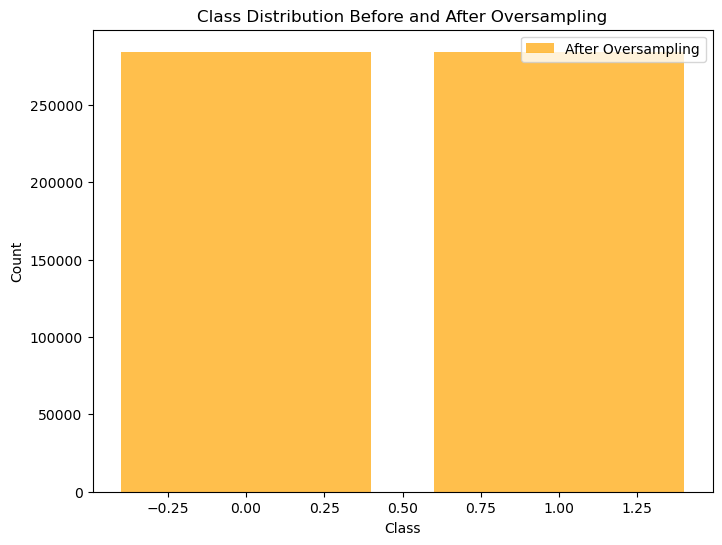

In [14]:
# Data after oversampling
class_counts_after = Counter(y)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(class_counts_after.keys(), class_counts_after.values(), color='orange', alpha=0.7, label='After Oversampling')

ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution Before and After Oversampling')
ax.legend()

plt.show()

In [15]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train.shape, y_train.shape

((398041, 29), (398041,))

In [17]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     85475
           1       0.98      0.93      0.96     85114

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



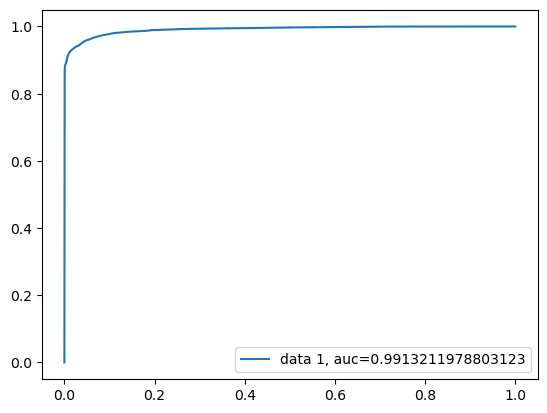

In [18]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_lr)
auc = roc_auc_score(y_test, y_pred_proba_lr)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<Axes: >

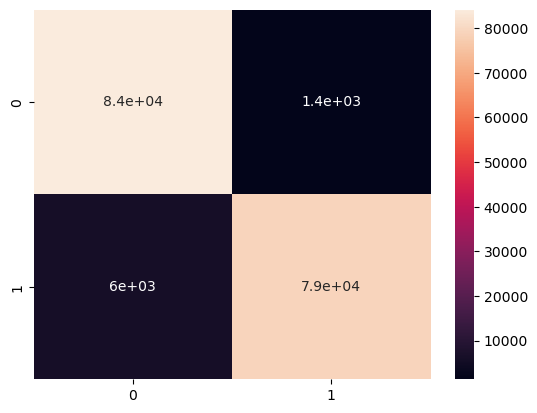

In [19]:
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True)

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85475
           1       1.00      1.00      1.00     85114

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



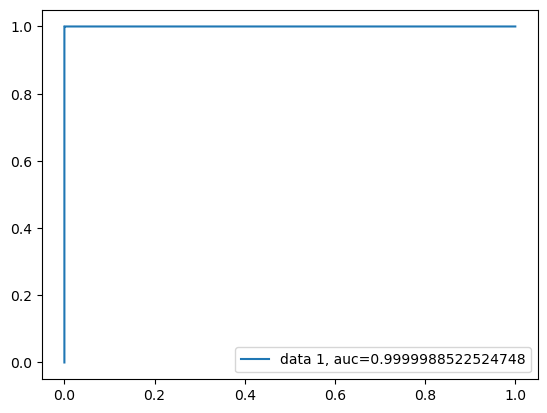

In [21]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_rf)
auc = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<Axes: >

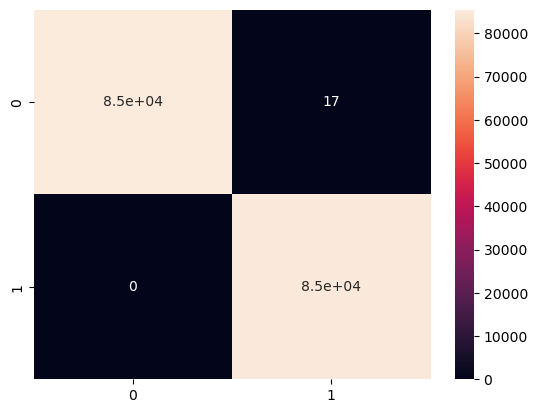

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf_matrix, annot=True)